In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("Clean_Data_LogReg.csv")
df.sample(10)

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,...,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_22,admission_source_id_25
301,50,5,50,1,18,0,0,0,9,-200,...,0,0,0,0,0,0,0,0,0,0
54727,40,1,2,1,21,4,0,4,9,-200,...,0,0,0,0,0,0,0,0,0,0
8372,60,1,11,1,19,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
52463,50,2,61,0,17,0,0,1,5,-200,...,0,1,0,0,0,0,0,0,0,0
2743,70,2,14,1,20,0,0,0,7,-200,...,0,0,0,0,0,0,0,0,0,0
36041,70,1,45,0,8,0,0,1,7,0,...,0,1,0,0,0,0,0,0,0,0
13145,70,1,1,1,17,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
9465,60,5,17,1,34,2,0,0,5,0,...,0,0,0,1,0,0,0,0,0,0
5067,70,3,61,1,11,0,0,0,3,-200,...,0,1,0,0,0,0,0,0,0,0
41438,50,5,48,4,23,0,0,0,6,-200,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import scikitplot as skplt 
import matplotlib.pyplot as plt

def compute_precision(tp, fp):
    return tp / (tp + fp)

def compute_recall(tp, fn):
    return tp / (tp + fn)

def conf_metrics(y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    conf_mat = confusion_matrix(y_test, y_pred)
    print(conf_mat)
    tn, fp, fn, tp = conf_mat.ravel()
    print("True Negatives: ",tn)
    print("False Positives: ",fp)
    print("False Negatives: ",fn)
    print("True Positives: ",tp)
    precision = compute_precision(tp, fp)
    recall = compute_recall(tp, fn)
    print('Precision: {0:.2f}\nRecall: {1:.2f}'.format(precision, recall))

def plot_roc_auc(model,X_test,y_test):
    y_pred_proba = model.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_pred_proba)
    plt.show()

## Short term Risk Prediction

In [5]:
X = df.drop(['readmitted','within30'],axis=1)
y = df['within30']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)
y_test.value_counts()

0    19168
1      939
Name: within30, dtype: int64

In [6]:
y_train.value_counts()

0    44691
1     2225
Name: within30, dtype: int64

Accuracy: 73.14%
[[14195  4973]
 [  427   512]]
True Negatives:  14195
False Positives:  4973
False Negatives:  427
True Positives:  512
Precision: 0.09
Recall: 0.55


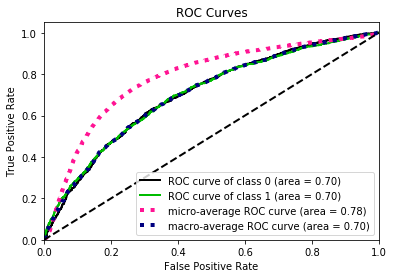

In [8]:
# Version with feature engineering complete
logReg3 = LogisticRegression(solver='liblinear',max_iter=1000, random_state=5,class_weight={0:1,1:18}).fit(X_train, y_train)
y_pred_lr3 = logReg2.predict(X_test)
conf_metrics(y_test, y_pred_lr3)
plot_roc_auc(logReg3,X_test,y_test)

It's really interesting that grouping the null value categories hasn't improved our Recall or Precision, but actually decreased our Accuracy and AUC.

## Long Term Risk Prediction

In [9]:
y = df['readmitted']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)
y_test.value_counts()

0    15105
1     5002
Name: readmitted, dtype: int64

In [10]:
y_train.value_counts()

0    35153
1    11763
Name: readmitted, dtype: int64

Accuracy: 63.31%
[[9617 5488]
 [1890 3112]]
True Negatives:  9617
False Positives:  5488
False Negatives:  1890
True Positives:  3112
Precision: 0.36
Recall: 0.62


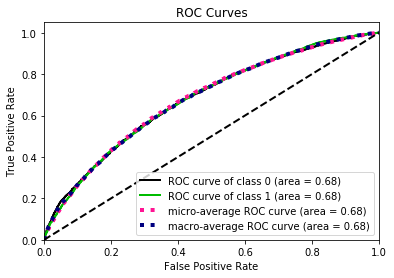

In [11]:
# Logistic Regression for Long term risk
logReg4 = LogisticRegression(solver='liblinear',max_iter=1000, random_state=5,class_weight={0:1,1:3}).fit(X_train, y_train)
y_pred_lr4 = logReg4.predict(X_test)
conf_metrics(y_test, y_pred_lr4)
plot_roc_auc(logReg4, X_test, y_test)

Same with long term risk prediction. Our Accuracy and AUC actually decreased with the grouping. The Baseline model with proper class weights gives us the best results.